In [1]:
import sentinelsat
import datetime

In [2]:
import yaml
with open("../api_keys.yml", 'r') as ymlfile:
    credentials = yaml.load(ymlfile, Loader=yaml.FullLoader)

### Request information on available Sentinel-2 Data Products

In [3]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

api = SentinelAPI(credentials['sentinel']['username'], credentials['sentinel']['password'])

In [4]:
geojson = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              11.5625094932318,
              48.17204693371107
            ],
            [
              11.5625094932318,
              48.12954099057072
            ],
            [
              11.617322565241011,
              48.12954099057072
            ],
            [
              11.617322565241011,
              48.17204693371107
            ],
            [
              11.5625094932318,
              48.17204693371107
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}
aoi = geojson_to_wkt(geojson)

In [5]:
# specify the date range
start_date = datetime.datetime(2022, 8, 1)
end_date = datetime.datetime(2022, 8, 30)

# query the API for Sentinel-2 images
products = api.query(
    aoi,
    date=(start_date, end_date),
    platformname='Sentinel-2',
    producttype = ('S2MSI2A'),
    #tileid = '32UQU',
    cloudcoverpercentage=(0, 1)
)
print(f"{len(products)} products found")

3 products found


In [6]:
for product in products:
    print(product)
    print(products[product]['title'])

c1385af0-528e-4193-9afd-9bec05a79c7c
S2B_MSIL2A_20220811T100559_N0400_R022_T32UPU_20220811T162101
58799721-2e66-45f3-aab4-99bcbdaacf35
S2A_MSIL2A_20220809T102041_N0400_R065_T32UPU_20220809T180703
e2c1fc7d-6c8c-4dba-a526-b27c20f0933b
S2B_MSIL2A_20220804T101559_N0400_R065_T32UPU_20220804T130854


In [7]:
from shapely.geometry import box, Polygon
bbox = box(*[11.310790,47.980475,11.855986,48.385189])

### Plot the footprint of available products

In [8]:
from shapely.wkt import loads
import folium
colors = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white']
m = folium.Map(location=[48.22241664271897, 11.47694358493132], zoom_start=8)
#folium.GeoJson(aoi, style_function=lambda x: {'color':'red'} ).add_to(m)
for i, product in enumerate(products):
    footprint = loads(products[product]['footprint'])
    folium.GeoJson(footprint, style_function=lambda x: {'color':'green'} ).add_to(m)
m

### Check results in more detail

In [9]:
results = api.to_geodataframe(products)
results.columns

Index(['title', 'link', 'link_alternative', 'link_icon', 'summary', 'ondemand',
       'generationdate', 'beginposition', 'endposition', 'ingestiondate',
       'orbitnumber', 'relativeorbitnumber', 'illuminationazimuthangle',
       'illuminationzenithangle', 'vegetationpercentage',
       'notvegetatedpercentage', 'waterpercentage', 'unclassifiedpercentage',
       'mediumprobacloudspercentage', 'highprobacloudspercentage',
       'snowicepercentage', 'cloudcoverpercentage', 'level1cpdiidentifier',
       'format', 'processingbaseline', 'platformname', 'filename',
       'instrumentname', 'instrumentshortname', 'size', 's2datatakeid',
       'producttype', 'platformidentifier', 'orbitdirection',
       'platformserialidentifier', 'processinglevel', 'datastripidentifier',
       'granuleidentifier', 'identifier', 'uuid', 'geometry'],
      dtype='object')

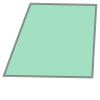

In [10]:
results['geometry'][0]

In [11]:
api.get_product_odata(results.index[0], full = True)

{'id': 'c1385af0-528e-4193-9afd-9bec05a79c7c',
 'title': 'S2B_MSIL2A_20220811T100559_N0400_R022_T32UPU_20220811T162101',
 'size': 956807380,
 'md5': 'df3d4738e1da04167cf3d337f8ec110b',
 'date': datetime.datetime(2022, 8, 11, 10, 5, 59, 24000),
 'footprint': 'POLYGON((10.592706190891207 47.75275589784114,10.598495467761298 47.76871779672226,10.652053203180367 47.91509708756361,10.705818184130274 48.0614660847273,10.759929296536573 48.20779297553245,10.814442802983317 48.3540914961274,10.869008692454596 48.50044924820117,10.923973689633174 48.646757650611576,10.957135060050277 48.73406851326975,11.852438708473068 48.71769475117851,11.798094715302927 47.73104447774509,10.592706190891207 47.75275589784114))',
 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('c1385af0-528e-4193-9afd-9bec05a79c7c')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 8, 11, 18, 56, 2, 577000),
 'Ingestion Date': datetime.datetime(2022, 8, 11, 18, 55, 53, 695000),
 'Aot retrieval 

In [14]:
api.download(results.index[0], directory_path='/Users/maltegenschow/Documents/Uni/SoSe23/Data Science Project/data/Sentinel')

MD5 checksumming:   0%|          | 0.00/957M [00:00<?, ?B/s]

{'id': 'c1385af0-528e-4193-9afd-9bec05a79c7c',
 'title': 'S2B_MSIL2A_20220811T100559_N0400_R022_T32UPU_20220811T162101',
 'size': 956807380,
 'md5': 'df3d4738e1da04167cf3d337f8ec110b',
 'date': datetime.datetime(2022, 8, 11, 10, 5, 59, 24000),
 'footprint': 'POLYGON((10.592706190891207 47.75275589784114,10.598495467761298 47.76871779672226,10.652053203180367 47.91509708756361,10.705818184130274 48.0614660847273,10.759929296536573 48.20779297553245,10.814442802983317 48.3540914961274,10.869008692454596 48.50044924820117,10.923973689633174 48.646757650611576,10.957135060050277 48.73406851326975,11.852438708473068 48.71769475117851,11.798094715302927 47.73104447774509,10.592706190891207 47.75275589784114))',
 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('c1385af0-528e-4193-9afd-9bec05a79c7c')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 8, 11, 18, 56, 2, 577000),
 'Ingestion Date': datetime.datetime(2022, 8, 11, 18, 55, 53, 695000),
 'manifest_name'